In [31]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


In [32]:
shp_path = "../data/shapefile/DemarcHidrograficas_mayo2023.shp"
gdf_cuencas = gpd.read_file(shp_path)
gdf_cuencas.head()

,CodDemarc,Nombre,Internacio,NombreInt,Label,UnidadArea,AreaRBD,AreaRBDExc,localId,namespace,...,TipoZona,BaseLegal,LinkLegal,NivelLegal,CodDemarTr,EsqDemarTr,EsqCodDema,EsqPredeId,link,geometry
0,ES120,GRAN CANARIA,No,GRAN CANARIA,Gran Canaria,km2,2110.908,1575.115,ES120,https://www.miteco.gob.es/,...,riverBasinDistrict,Directive 2000/60/EC of the European Parliamen...,http://data.europa.eu/eli/dir/2000/60/oj,european,NotApplicable,NotApplicable,euRBDCode,NotApplicable,NotApplicable,"POLYGON ((-15.68568 28.18781, -15.68443 28.187..."
1,ES122,FUERTEVENTURA,No,FUERTEVENTURA,Fuerteventura,km2,2894.236,1657.874,ES122,https://www.miteco.gob.es/,...,riverBasinDistrict,Directive 2000/60/EC of the European Parliamen...,http://data.europa.eu/eli/dir/2000/60/oj,european,NotApplicable,NotApplicable,euRBDCode,NotApplicable,NotApplicable,"POLYGON ((-13.84844 28.82578, -13.84863 28.826..."
2,ES123,LANZAROTE,No,LANZAROTE,Lanzarote,km2,2117.738,844.849,ES123,https://www.miteco.gob.es/,...,riverBasinDistrict,Directive 2000/60/EC of the European Parliamen...,http://data.europa.eu/eli/dir/2000/60/oj,european,NotApplicable,NotApplicable,euRBDCode,NotApplicable,NotApplicable,"POLYGON ((-13.45128 29.39828, -13.32118 29.288..."
3,ES125,LA PALMA,No,LA PALMA,La Palma,km2,981.420,706.078,ES125,https://www.miteco.gob.es/,...,riverBasinDistrict,Directive 2000/60/EC of the European Parliamen...,http://data.europa.eu/eli/dir/2000/60/oj,european,NotApplicable,NotApplicable,euRBDCode,NotApplicable,NotApplicable,"POLYGON ((-17.92193 28.8743, -17.92067 28.8743..."
4,ES127,EL HIERRO,No,EL HIERRO,El Hierro,km2,528.979,267.871,ES127,https://www.miteco.gob.es/,...,riverBasinDistrict,Directive 2000/60/EC of the European Parliamen...,http://data.europa.eu/eli/dir/2000/60/oj,european,NotApplicable,NotApplicable,euRBDCode,NotApplicable,NotApplicable,"POLYGON ((-17.93596 27.86573, -17.93585 27.865..."


In [33]:
gdf_cuencas.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CodDemarc   25 non-null     str     
 1   Nombre      25 non-null     str     
 2   Internacio  25 non-null     str     
 3   NombreInt   25 non-null     str     
 4   Label       25 non-null     str     
 5   UnidadArea  25 non-null     str     
 6   AreaRBD     25 non-null     float64 
 7   AreaRBDExc  25 non-null     float64 
 8   localId     25 non-null     str     
 9   namespace   25 non-null     str     
 10  versionId   25 non-null     str     
 11  FechaIni    25 non-null     str     
 12  FechaFin    25 non-null     str     
 13  IdiomaNom   25 non-null     str     
 14  PredecesId  25 non-null     str     
 15  Evolucion   25 non-null     str     
 16  DesigIni    25 non-null     str     
 17  DesigFin    25 non-null     str     
 18  TipoZona    25 non-null     str     
 19  Ba

In [34]:
# dataset de embalses
df_embalses = pd.read_csv("../files/embalses_historico.csv")

# Normalizamos nombres
gdf_cuencas["Nombre"] = gdf_cuencas["Nombre"].str.strip().str.upper()
df_embalses["AMBITO_NOMBRE"] = df_embalses["AMBITO_NOMBRE"].str.strip().str.upper()

# Diccionario de correspondencias CSV -> shapefile
mapeo_cuencas = {
    "MIÑO - SIL": "MIÑO-SIL",
    "CUENCA MEDITERRÁNEA ANDALUZA": "CUENCAS MEDITERRÁNEAS ANDALUZAS",
    "GALICIA COSTA": "GALICIA-COSTA",
    "GUADALETE-BARBATE": "GUADALETE Y BARBATE",
    "CUENCAS INTERNAS DE CATALUÑA": "DISTRITO DE CUENCA FLUVIAL DE CATALUÑA",
    "CUENCAS INTERNAS DEL PAÍS VASCO": "CANTÁBRICO ORIENTAL"
}

# Aplicar mapeo
df_embalses["Nombre_shp"] = df_embalses["AMBITO_NOMBRE"].apply(
    lambda x: mapeo_cuencas.get(x, x)
)

# Merge para unir shapefile con embalses
df_embalses_geo = df_embalses.merge(gdf_cuencas[["Nombre","geometry"]], 
                                    left_on="AMBITO_NOMBRE", 
                                    right_on="Nombre", 
                                    how="left")
df_embalses_geo.head()

,AMBITO_NOMBRE,EMBALSE_NOMBRE,FECHA,AGUA_TOTAL,AGUA_ACTUAL,ELECTRICO_FLAG,Nombre_shp,Nombre,geometry
0,MIÑO - SIL,Albarellos,01/05/88 00:00:00,"91,00","32,00",1,MIÑO-SIL,NaN,None
1,MIÑO - SIL,Albarellos,01/12/88 00:00:00,"91,00","44,00",1,MIÑO-SIL,NaN,None
2,MIÑO - SIL,Albarellos,01/19/88 00:00:00,"91,00","42,00",1,MIÑO-SIL,NaN,None
3,MIÑO - SIL,Albarellos,01/26/88 00:00:00,"91,00","43,00",1,MIÑO-SIL,NaN,None
4,MIÑO - SIL,Albarellos,02/02/88 00:00:00,"91,00","65,00",1,MIÑO-SIL,NaN,None


In [35]:
df_embalses["AMBITO_NOMBRE"].unique()

<StringArray>
[                     'MIÑO - SIL',                           'DUERO',
                            'TAJO',                        'GUADIANA',
                    'GUADALQUIVIR',    'CUENCA MEDITERRÁNEA ANDALUZA',
                          'SEGURA',                           'JÚCAR',
                            'EBRO',    'CUENCAS INTERNAS DE CATALUÑA',
                   'GALICIA COSTA',           'CANTÁBRICO OCCIDENTAL',
             'CANTÁBRICO ORIENTAL', 'CUENCAS INTERNAS DEL PAÍS VASCO',
               'GUADALETE-BARBATE',          'TINTO, ODIEL Y PIEDRAS']
Length: 16, dtype: str

In [36]:
df_embalses_geo.info()

<class 'pandas.DataFrame'>
RangeIndex: 710749 entries, 0 to 710748
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   AMBITO_NOMBRE   710749 non-null  str     
 1   EMBALSE_NOMBRE  710749 non-null  str     
 2   FECHA           710749 non-null  str     
 3   AGUA_TOTAL      710747 non-null  str     
 4   AGUA_ACTUAL     710747 non-null  str     
 5   ELECTRICO_FLAG  710749 non-null  int64   
 6   Nombre_shp      710749 non-null  str     
 7   Nombre          573242 non-null  str     
 8   geometry        573242 non-null  geometry
dtypes: geometry(1), int64(1), str(7)
memory usage: 48.8 MB


In [37]:
gdf_cuencas["Nombre"].unique()

<StringArray>
[                          'GRAN CANARIA',
                          'FUERTEVENTURA',
                              'LANZAROTE',
                               'LA PALMA',
                              'EL HIERRO',
                                  'CEUTA',
                    'CANTÁBRICO ORIENTAL',
                                 'SEGURA',
                         'ISLAS BALEARES',
                                'MELILLA',
                    'GUADALETE Y BARBATE',
                               'TENERIFE',
                          'GALICIA-COSTA',
                  'CANTÁBRICO OCCIDENTAL',
                                  'DUERO',
                                   'TAJO',
                                  'JÚCAR',
                              'LA GOMERA',
                           'GUADALQUIVIR',
                 'TINTO, ODIEL Y PIEDRAS',
                               'GUADIANA',
        'CUENCAS MEDITERRÁNEAS ANDALUZAS',
 'DISTRITO DE CUENCA FLUVIAL DE CATALUÑA

In [38]:
df_embalses_geo["AMBITO_NOMBRE"].unique()

<StringArray>
[                     'MIÑO - SIL',                           'DUERO',
                            'TAJO',                        'GUADIANA',
                    'GUADALQUIVIR',    'CUENCA MEDITERRÁNEA ANDALUZA',
                          'SEGURA',                           'JÚCAR',
                            'EBRO',    'CUENCAS INTERNAS DE CATALUÑA',
                   'GALICIA COSTA',           'CANTÁBRICO OCCIDENTAL',
             'CANTÁBRICO ORIENTAL', 'CUENCAS INTERNAS DEL PAÍS VASCO',
               'GUADALETE-BARBATE',          'TINTO, ODIEL Y PIEDRAS']
Length: 16, dtype: str

In [39]:
# Filas sin geometría
faltan_geometry = df_embalses_geo[df_embalses_geo['geometry'].isna()]
print(f"Filas sin geometry: {len(faltan_geometry)}")

# Mostrar algunas para inspección
faltan_geometry[['AMBITO_NOMBRE','EMBALSE_NOMBRE']].drop_duplicates()


Filas sin geometry: 137507


,AMBITO_NOMBRE,EMBALSE_NOMBRE
0,MIÑO - SIL,Albarellos
1990,MIÑO - SIL,Bao
3980,MIÑO - SIL,Bárcena
5970,MIÑO - SIL,Belesar
7960,MIÑO - SIL,"Campañana, La"
...,...,...
687667,GUADALETE-BARBATE,Bornos
689657,GUADALETE-BARBATE,Celemín
693637,GUADALETE-BARBATE,Guadalcacín II
695627,GUADALETE-BARBATE,"Hurones, Los"


In [40]:
# Diccionario de correspondencias CSV -> shapefile
mapeo_cuencas = {
    "MIÑO - SIL": "MIÑO-SIL",
    "CUENCA MEDITERRÁNEA ANDALUZA": "CUENCAS MEDITERRÁNEAS ANDALUZAS",
    "GALICIA COSTA": "GALICIA-COSTA",
    "GUADALETE-BARBATE": "GUADALETE Y BARBATE",
    "CUENCAS INTERNAS DE CATALUÑA": "DISTRITO DE CUENCA FLUVIAL DE CATALUÑA",
    "CUENCAS INTERNAS DEL PAÍS VASCO": "CANTÁBRICO ORIENTAL"
}

# Aplicar mapeo
df_embalses["Nombre_shp"] = df_embalses["AMBITO_NOMBRE"].apply(
    lambda x: mapeo_cuencas.get(x, x)
)

In [41]:
df_embalses_geo = df_embalses.merge(
    gdf_cuencas[["Nombre","geometry"]],
    left_on="Nombre_shp",
    right_on="Nombre",
    how="left"
)
# Filas sin geometría
faltan_geometry = df_embalses_geo[df_embalses_geo['geometry'].isna()]
print(f"Filas sin geometry: {len(faltan_geometry)}")

# Mostrar algunas para inspección
faltan_geometry[['AMBITO_NOMBRE','EMBALSE_NOMBRE']].drop_duplicates()

Filas sin geometry: 0


,AMBITO_NOMBRE,EMBALSE_NOMBRE


In [42]:
# Número de embalses por cuenca
df_embalses_geo.groupby('AMBITO_NOMBRE').size().sort_values(ascending=False)


AMBITO_NOMBRE
EBRO                               122499
GUADALQUIVIR                       103547
TAJO                                99913
GUADIANA                            69106
DUERO                               66645
MIÑO - SIL                          57710
JÚCAR                               44630
SEGURA                              29052
GALICIA COSTA                       21890
CUENCA MEDITERRÁNEA ANDALUZA        21572
CANTÁBRICO OCCIDENTAL               17911
CUENCAS INTERNAS DE CATALUÑA        16435
GUADALETE-BARBATE                   15920
TINTO, ODIEL Y PIEDRAS              13132
CANTÁBRICO ORIENTAL                  6807
CUENCAS INTERNAS DEL PAÍS VASCO      3980
dtype: int64

In [43]:
df_embalses_geo[df_embalses_geo["AMBITO_NOMBRE"] == 
                "CUENCAS INTERNAS DEL PAÍS VASCO"]["geometry"].isna().sum()


np.int64(0)

## Agregar embalses por cuenca y fecha

In [44]:
df_embalses_geo["AGUA_ACTUAL"] = (
    df_embalses_geo["AGUA_ACTUAL"]
    .str.replace(".", "", regex=False)   # quitar separador miles
    .str.replace(",", ".", regex=False)  # convertir decimal
)

df_embalses_geo["AGUA_TOTAL"] = (
    df_embalses_geo["AGUA_TOTAL"]
    .str.replace(".", "", regex=False)
    .str.replace(",", ".", regex=False)
)


df_embalses_geo["AGUA_ACTUAL"] = pd.to_numeric(df_embalses_geo["AGUA_ACTUAL"], errors="coerce")
df_embalses_geo["AGUA_TOTAL"] = pd.to_numeric(df_embalses_geo["AGUA_TOTAL"], errors="coerce")

df_embalses_geo["FECHA"] = pd.to_datetime(df_embalses_geo["FECHA"])

df_cuenca_fecha = (
    df_embalses_geo
    .groupby(["AMBITO_NOMBRE","FECHA"])
    .agg({
        "AGUA_ACTUAL": "sum",
        "AGUA_TOTAL": "sum"
    })
    .reset_index()
)

df_cuenca_fecha["PORCENTAJE_LLENO"] = (
    df_cuenca_fecha["AGUA_ACTUAL"] /
    df_cuenca_fecha["AGUA_TOTAL"]
)


/tmp/ipykernel_19539/187433563.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_embalses_geo["FECHA"] = pd.to_datetime(df_embalses_geo["FECHA"])


In [45]:
df_cuenca_fecha


,AMBITO_NOMBRE,FECHA,AGUA_ACTUAL,AGUA_TOTAL,PORCENTAJE_LLENO
0,CANTÁBRICO OCCIDENTAL,1988-01-05,429.0,532.0,0.806391
1,CANTÁBRICO OCCIDENTAL,1988-01-12,444.0,532.0,0.834586
2,CANTÁBRICO OCCIDENTAL,1988-01-19,417.0,532.0,0.783835
3,CANTÁBRICO OCCIDENTAL,1988-01-26,397.0,532.0,0.746241
4,CANTÁBRICO OCCIDENTAL,1988-02-02,440.0,532.0,0.827068
...,...,...,...,...,...
31837,"TINTO, ODIEL Y PIEDRAS",2026-01-20,207.0,229.0,0.903930
31838,"TINTO, ODIEL Y PIEDRAS",2026-01-27,214.0,229.0,0.934498
31839,"TINTO, ODIEL Y PIEDRAS",2026-02-03,217.0,229.0,0.947598
31840,"TINTO, ODIEL Y PIEDRAS",2026-02-10,218.0,229.0,0.951965


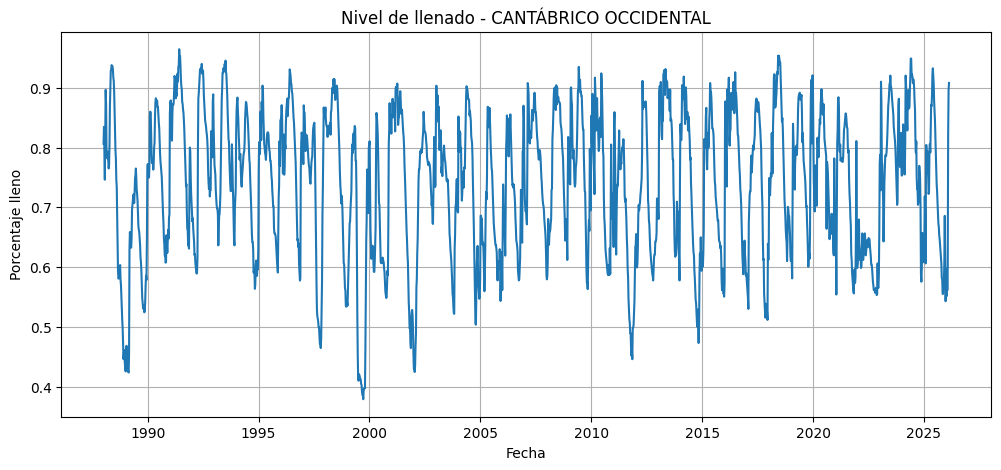

In [47]:
cuenca = "CANTÁBRICO OCCIDENTAL"

df_plot = df_cuenca_fecha[
    df_cuenca_fecha["AMBITO_NOMBRE"] == cuenca
].sort_values("FECHA")

plt.figure(figsize=(12,5))
plt.plot(df_plot["FECHA"], df_plot["PORCENTAJE_LLENO"])
plt.title(f"Nivel de llenado - {cuenca}")
plt.xlabel("Fecha")
plt.ylabel("Porcentaje lleno")
plt.grid(True)
plt.show()
